<a href="https://colab.research.google.com/github/DaniSBoy/Trabalhos-Introducao-Ciencias-De-Dados/blob/main/projeto_final_trabalhos_pagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<p>
<center>
Universidade Federal de Minas Gerais <br/>
Introdução à Programação de Computadores <br/>
2022/2
</center>
</p>								
<h1><b>Projeto Prático Final</b></h1>
<b>Total: 15 pontos</b>
</center>		

<br/>
<p>
<h4><b>Professores:</b></h4>
<ul>
    <li>Adriano César Machado Pereira</li>
    <li>George Luiz Medeiros Teodoro</li>
    <li>João Guilherme Maia de Menezes</li>
</ul>	

In [ ]:
#@markdown ####**Aluno** {run: "auto"}
Nome = "" #@param {type:"string"}
Matrícula = "" #@param {type:"string"}

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados sobre economia mineral no Brasil gerados pela Agência Nacional de Mineração. Os dados utilizados estão disponíveis em [https://www.gov.br/anm](https://www.gov.br/anm/pt-br)

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.

**OBS1: Execute as duas células abaixo**

**OBS2: O arquivo é grande, então pode demorar para realizar o download (cerca de 10 minutos)**


In [ ]:
import requests

URL = 'https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv'
r = requests.get(URL, allow_redirects=True)
file_name = URL.split('/')[-1]
with open(file_name, 'wb') as f:
    f.write(r.content)

In [ ]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    with open(filename, 'r', encoding='ISO-8859-1') as file:
    
        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes: 
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados[-1][-3] = dados[-1][-3].replace(',','.')
            dados[-1][-1] = dados[-1][-1].replace(',','.')
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("CFEM_Arrecadacao.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))
print()

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido'] 

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 1765606

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}


Tarefa 1 - Evolução da arrecadação ao longo dos anos - (3 pontos)
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico com o valor recolhido do CFEM no Estado de Minas Gerais ao longo dos anos (2004 a 2022 em milhões de reais).



Text(0, 0.5, 'Arrecadação (em milhões de reais)')

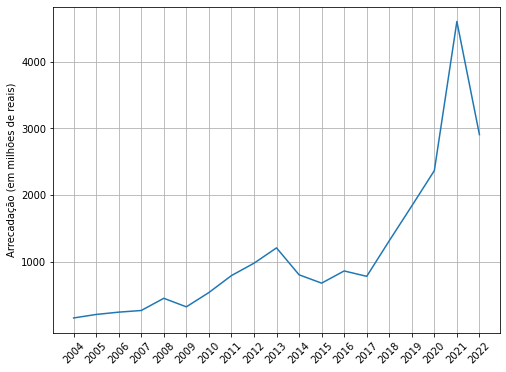

In [ ]:
from typing import ValuesView
import matplotlib.pyplot as plt

def MG_adquired_value(dados):
  result = {}
  for line in dados:
    if line[reg['UF']] == 'MG':
      line_year = int(line[reg['Ano']])
      line_adquired_value = float(line[reg['ValorRecolhido']]) / 1000000

      if line_year >= 2004 and line_year <= 2022:
        if line_year in result:
          result[line_year] += line_adquired_value
        else:
          result[line_year] = line_adquired_value
  return result

values = MG_adquired_value(dados)
years = list(values.keys())
sum_values = list(values.values())

plt.grid()
plt.ylabel('Arrecadação (em milhões de reais)')
plt.plot(years, sum_values)
plt.xticks(years, rotation=45)
plt.yticks([1000, 2000, 3000, 4000])
plt.ylabel('Arrecadação (em milhões de reais)')

Tarefa 2 - Extração de bauxita por estado entre 2015 e 2021 - (3 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra a extração de bauxita (**'BAUXITA'**) por estado brasileiro entre os anos de 2015 e 2021. 

**Dica 1:** Bauxita é representada pela string 'BAUXITA' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

In [ ]:
def sort_values(valores):
  aux = list(valores.items())
  states = []
  values = []

  for i in range(len(aux)):
    max = 0
    for j in range(len(aux)):
      if aux[j][1] > aux[max][1]:
        max = j

    removed = aux.pop(max)

    states.append(removed[0])
    values.append(removed[1])

  return states, values

<BarContainer object of 6 artists>

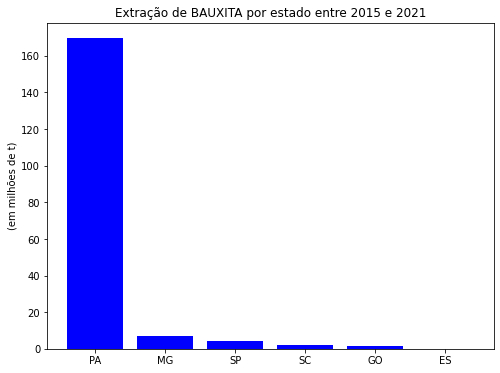

In [ ]:
def extract_mineral(dados, i_year, f_year, mineral):
  result = {}
  for line in dados:
    sub = line[reg['Substância']]
    qtd = line[reg['QuantidadeComercializada']]
    state = line[reg['UF']]

    if int(line[reg['Ano']]) >= i_year and int(line[reg['Ano']]) <= f_year and state != '':
      if sub == mineral and qtd != '':
        if state in result:
          result[state] += float(qtd) / 1000000
        else:
          result[state] = float(qtd) / 1000000
    
  return sort_values(result)

states, values = extract_mineral(dados, 2015, 2021, 'BAUXITA')

plt.title('Extração de BAUXITA por estado entre 2015 e 2021')
plt.ylabel('(em milhões de t)')
plt.yticks([160, 140, 120, 100, 80, 60, 40, 20, 0])
plt.bar(states, values, color='blue')

Tarefa 3 - Extração de ouro por estado nos últimos dez anos - (3 pontos)
---------

Implemente funções para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2011 até 2021) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

**Dica 1:** Ouro é representado pela string 'OURO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

<BarContainer object of 13 artists>

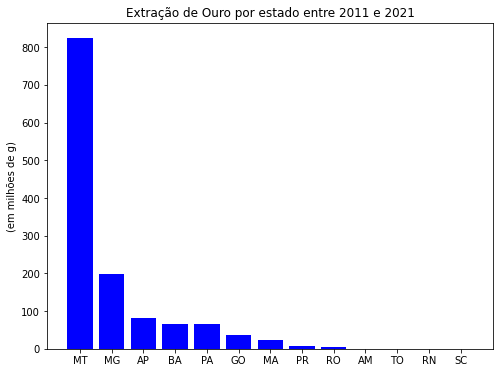

In [ ]:
states, values = extract_mineral(dados, 2011, 2021, 'OURO')

plt.ylabel('(em milhões de g)')
plt.title('Extração de Ouro por estado entre 2011 e 2021')
plt.bar(states, values, color='blue')

Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará - (3 pontos)
---------

Implemente funções para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 2003 até 2022). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

**Dica 1:** Ferro é representada pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

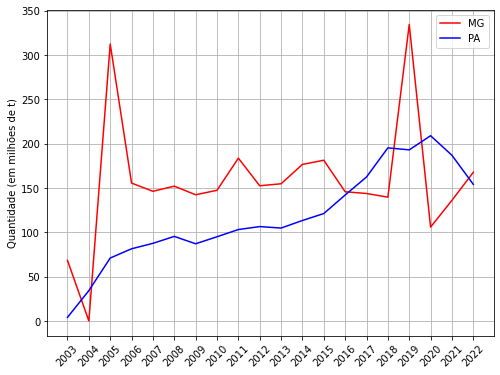

In [ ]:
def fun(dados, i_year, f_year, mineral):
  result = {'MG': {}, 'PA': {}}

  for line in dados:

    lineState = line[reg['UF']]

    if (lineState == 'MG' or lineState == 'PA') and line[reg['Substância']] == mineral and line[reg['QuantidadeComercializada']] != '':
      year = int(line[reg['Ano']])
      qtd = float(line[reg['QuantidadeComercializada']])

      if year >= i_year and year <= f_year:
        if year in result[lineState]:
          result[lineState][year] += qtd / 1000000
        else:
          result[lineState][year] = qtd / 1000000
  return result

values = fun(dados, 2003, 2022, 'FERRO')
statesMG = list(values['MG'].keys())
valuesMG = list(values['MG'].values())

statesPA = list(values['PA'].keys())
valuesPA = list(values['PA'].values())

plt.grid()
plt.plot(statesMG, valuesMG, label='MG', color='red')
plt.plot(statesPA, valuesPA, label='PA', color='blue')
plt.ylabel('Quantidade (em milhões de t)')
plt.xticks(states, states, rotation=45)
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350])

plt.legend()

Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul e Minas Gerais no ano de 2021 por tipo de minério extraído - (3 pontos)
---------

Implemente funções para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2021. Utilize o mesmo código para plotar o mesmo gráfico considerando apenas o Estado de Minas Gerais.

**Dica 1:** use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

**Dica 2:** por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


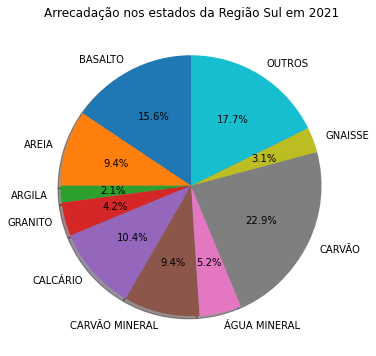

Text(0.5, 1.0, 'Arrecadação nos estados da Região Sul em 2021')

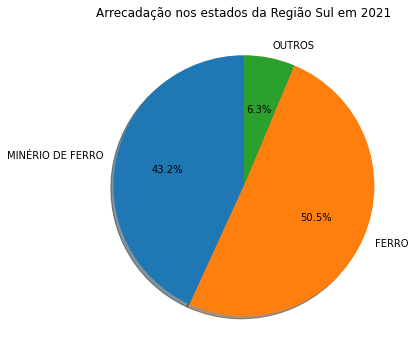

In [ ]:
def percent_values(dados, critery, states, year):
  
  result = {}

  total = 0
  for line in dados:

    if line[reg['UF']] in states:
      value = float(line[reg['ValorRecolhido']])
      mineral = line[reg['Substância']]

      if mineral in result:
        result[mineral] += value
      else:
        result[mineral] = value

      total += value
  
  minerals = list(result.keys())

  result['OUTROS'] = 0

  for mineral in minerals:
    if result[mineral] / total >= critery:
      result[mineral] = round((result[mineral] / total), 2) * 100
    else:
      result['OUTROS'] += round((result[mineral] / total), 2) * 100
      result.pop(mineral)

  return result

values = percent_values(dados, 0.02, ['SC', 'RS', 'PR'], 2021)
  
plt.pie(list(values.values()), labels=list(values.keys()), startangle=90, shadow=True, autopct='%1.1f%%')
plt.title('Arrecadação nos estados da Região Sul em 2021')
plt.show()
values = percent_values(dados, 0.05, ['MG'], 2021)

plt.pie(list(values.values()), labels=list(values.keys()), startangle=90, shadow=True, autopct='%1.1f%%')
plt.title('Arrecadação nos estados da Região Sul em 2021')